# Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes. First allow for a variable number of data points (and show for N=3 and N=10. Second, limit the range of valid solutions for  μμ  to  μ>1.1μ>1.1  (just for N=10). How does that affect your results? Use a random seed of 42 for all.


[ 1.54638557e+00  8.47909269e-01  1.71245739e+00  2.67533284e+00
  7.42431288e-01  7.42449347e-01  2.73713410e+00  1.84417820e+00
  4.83578175e-01  1.59681605e+00  4.90240538e-01  4.87697271e-01
  1.26615850e+00 -1.10460827e+00 -8.97409616e-01  3.81483718e-01
 -1.14114232e-01  1.34567207e+00  1.17351693e-03 -5.53534071e-01
  2.61221365e+00  7.51646069e-01  1.07428103e+00 -5.67223005e-01
  4.01179003e-01  1.12201485e+00 -2.66092935e-01  1.41326782e+00
  3.39297441e-01  6.79136875e-01  3.38122727e-01  3.03750600e+00
  9.85153053e-01 -1.63482022e-01  1.90479940e+00 -3.42928015e-01
  1.22974995e+00 -1.15563714e+00 -4.61004654e-01  1.21654736e+00
  1.81231324e+00  1.18850511e+00  8.72786889e-01  6.68785935e-01
 -6.26374189e-01  2.08171371e-01  4.93297352e-01  2.16283445e+00
  1.37798012e+00 -9.39344171e-01]


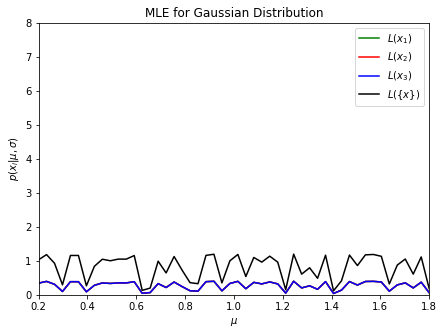

In [17]:
# import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)


N = 1
mu = 1.1
sigma = 0.2 
sample = norm(N,mu).rvs(50)
print(sample)


#Make the plot and see if you get the same as me.
muGrid = np.linspace(0.2,1.8,50)
L1 = norm.pdf(sample,loc=1,scale=1)
L2 = norm.pdf(sample,loc=1,scale=1)
L3 = norm.pdf(sample,loc=1,scale=1)
L = L1+L2+L3 #Total L is ???

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

# Problem 3 (25 points)¶
Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb. Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in. Your plots should look like the ones from class (or nicer!). Confirm that you get the same answer for day  NN  as day  N+1N+1  and it doesn't matter whether is was clear or cloudy on the day that you started.


Text(0,0.5,'post prob')

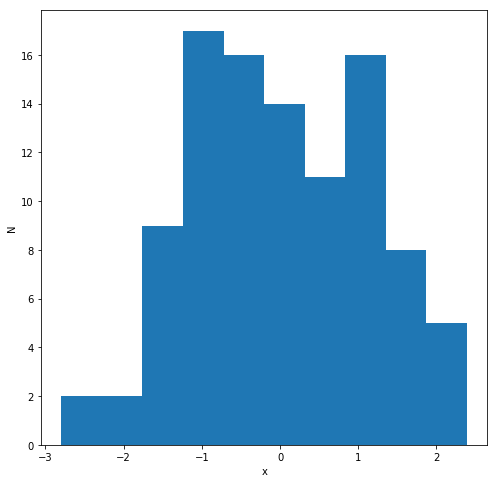

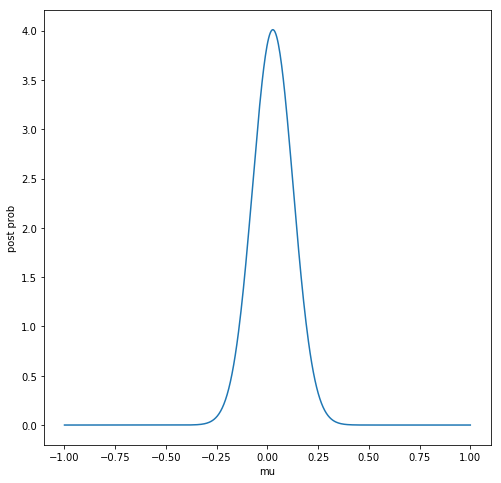

In [8]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(123)


data = np.random.randn(100)
plt.figure(figsize=(8,8))
plt.hist(data)
plt.xlabel('x')
plt.ylabel('N')


def calc_posterior_analytical(data, xgrid, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    #Error-weighted sum of prior and average of data
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    var_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm.pdf(xgrid,mu_post, np.sqrt(var_post))

plt.figure(figsize=(8,8))
xgrid = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, xgrid, 0., 1.)
plt.plot(xgrid, posterior_analytical)
plt.xlabel('mu')
plt.ylabel('post prob')


